<a href="https://colab.research.google.com/github/JeffersonEspinalA/Prueba/blob/main/Chapter_12_Decision_Based_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span>
<img src="http://ndlib.readthedocs.io/en/latest/_static/ndlogo2.png" width="260px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>NDlib version:</b>  5.1.0<br/>
<b>Last update:</b> 15/02/2021
</span>

<a id='top'></a>
# *Chapter 12: Decision Based Models*

In this notebook is introduced a basilar version of the Threshold model: for more advanced customizations refer to the ``NDlib`` documentation/appendix notebook.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

## Table of Contents

1. [Threshold Model](#model)
    1. [Model Selection and Configuration](#conf)
    2. [Simulation Execution](#simulation)
    3. [Results Visualisation](#visual)


<a id="model"></a>
## Threshold model ([to top](#top))

The threshold model describes a deterministic process where each unactive node becomes active as soon as a fixed fraction of its neighbors activates.

In [ ]:
!pip install ndlib
!pip install networkx==2.8.8

In [2]:
import ndlib
import networkx as nx

g = nx.erdos_renyi_graph(100, 0.1)

<a id="conf"></a>
#### Model Selection and Configuration ([to top](#top))

After having defined the graph, we have to instantiate the Threshold model.

In [3]:
import ndlib.models.epidemics as ep

model = ep.ThresholdModel(g)

In [4]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1}

The model needs to be configured as in the following example:

In [5]:
import ndlib.models.ModelConfig as mc

# Model Configuration
config = mc.Configuration()

# Setting node parameters
threshold = 0.2
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

``ModelConfig`` allows to describe the initial condition of the simulation.

It makes possible, for instance, to specify the initial percentage of infected nodes in the network.

In [6]:
config.add_model_parameter('fraction_infected', 0.1)

In [7]:
model.set_initial_status(config)

<a id="simulation"></a>
#### Simulation Execution ([to top](#top))

Once described the network, the model and the initial conditions it is possible to perform the simulation.

``NDlib`` models diffusive phenomena as **discrete-time**, **agent-based** processes: during every iteration all nodes are evaluated and, their statuses are updated accordingly to the model rules.

Iterations can be required (incrementally) by using two methods:
- ``iteration()``
- ``iteration_bunch(nbunch, node_status=False)``

The former computes a single iteration step, the latter executes ``nbunch`` iterations.

The ``node_status`` parameter allows to return the individual node status at each iteration.

In [8]:
iterations = model.iteration_bunch(10, node_status=True)

To abstract from iterations details it is possible to transform them into diffusion **trends** using the ``build_trends(iterations)`` method:

In [9]:
trends = model.build_trends(iterations)

<a id="top"></a>
####  Results Visualisation ([to top](#top))

Finally, ``NDlib`` allows to inspect the behavior of the simulated model using standard plots such as the ``DiffusionTrend`` and ``DiffusionPrevalence`` ones.

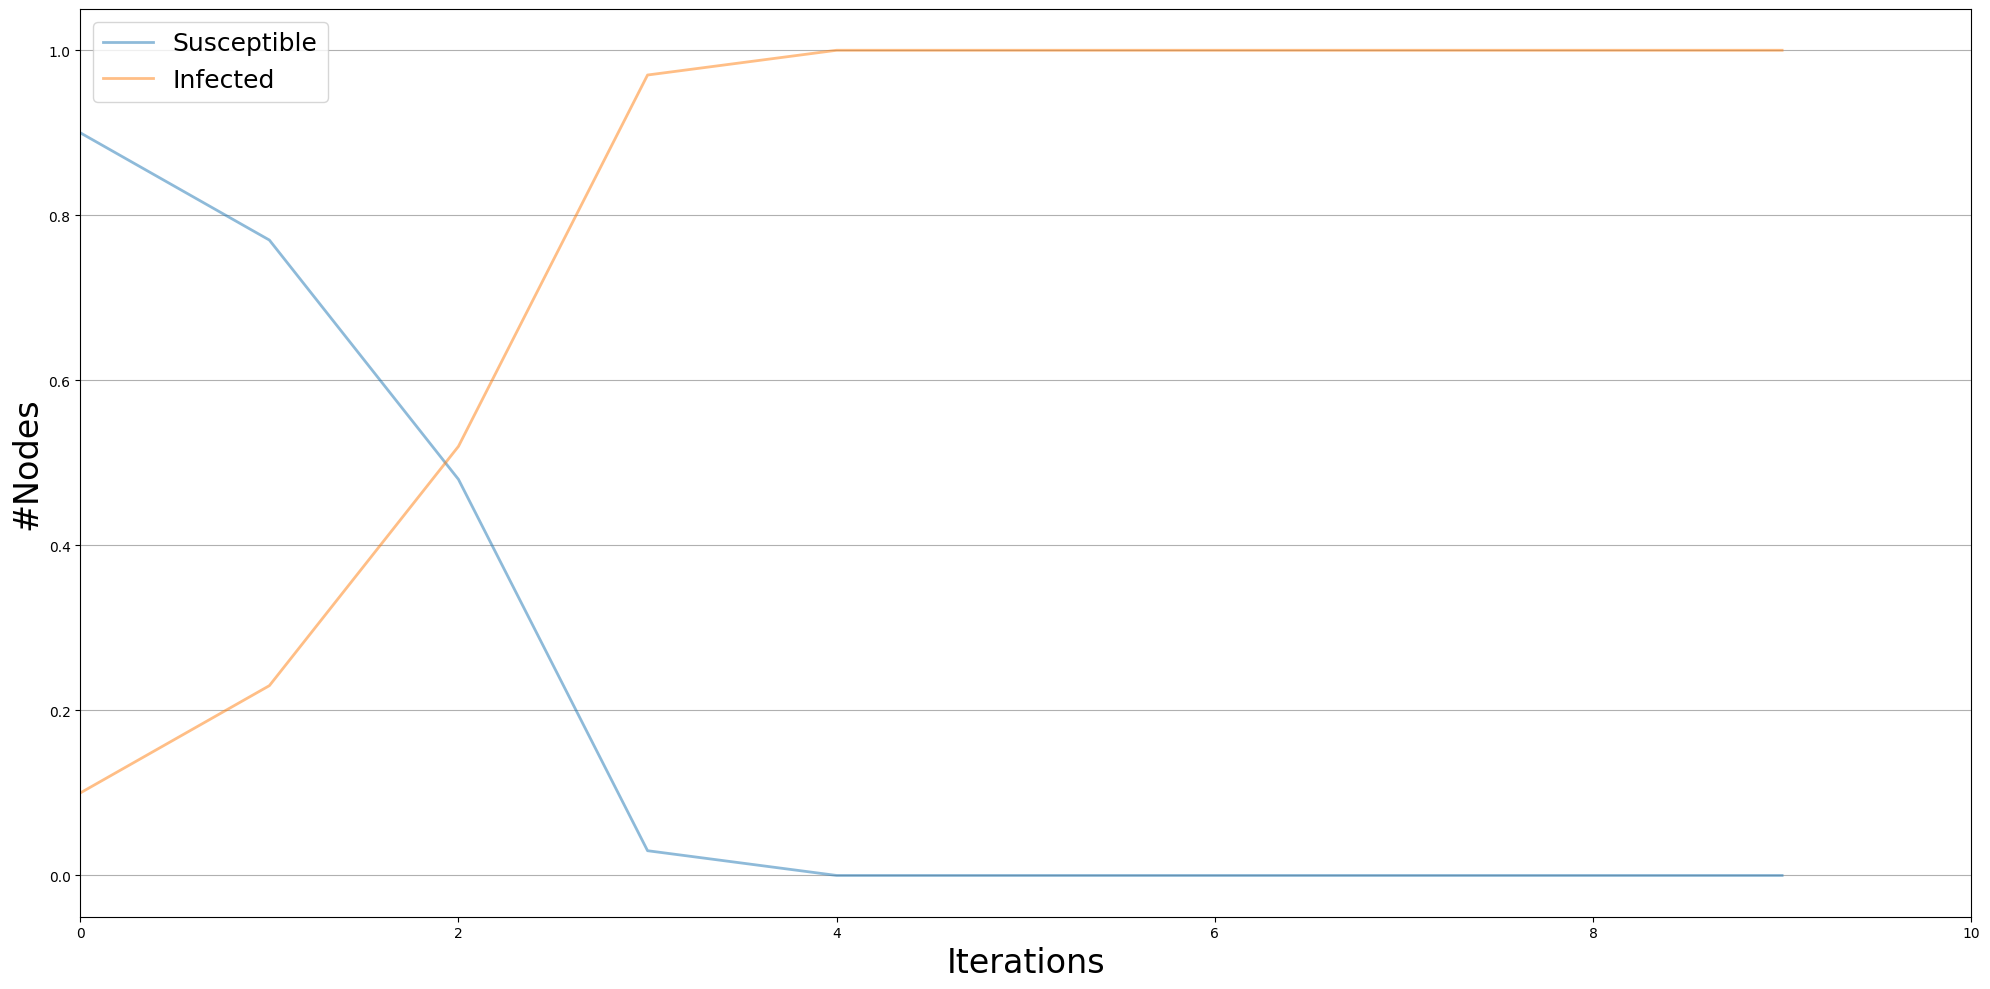

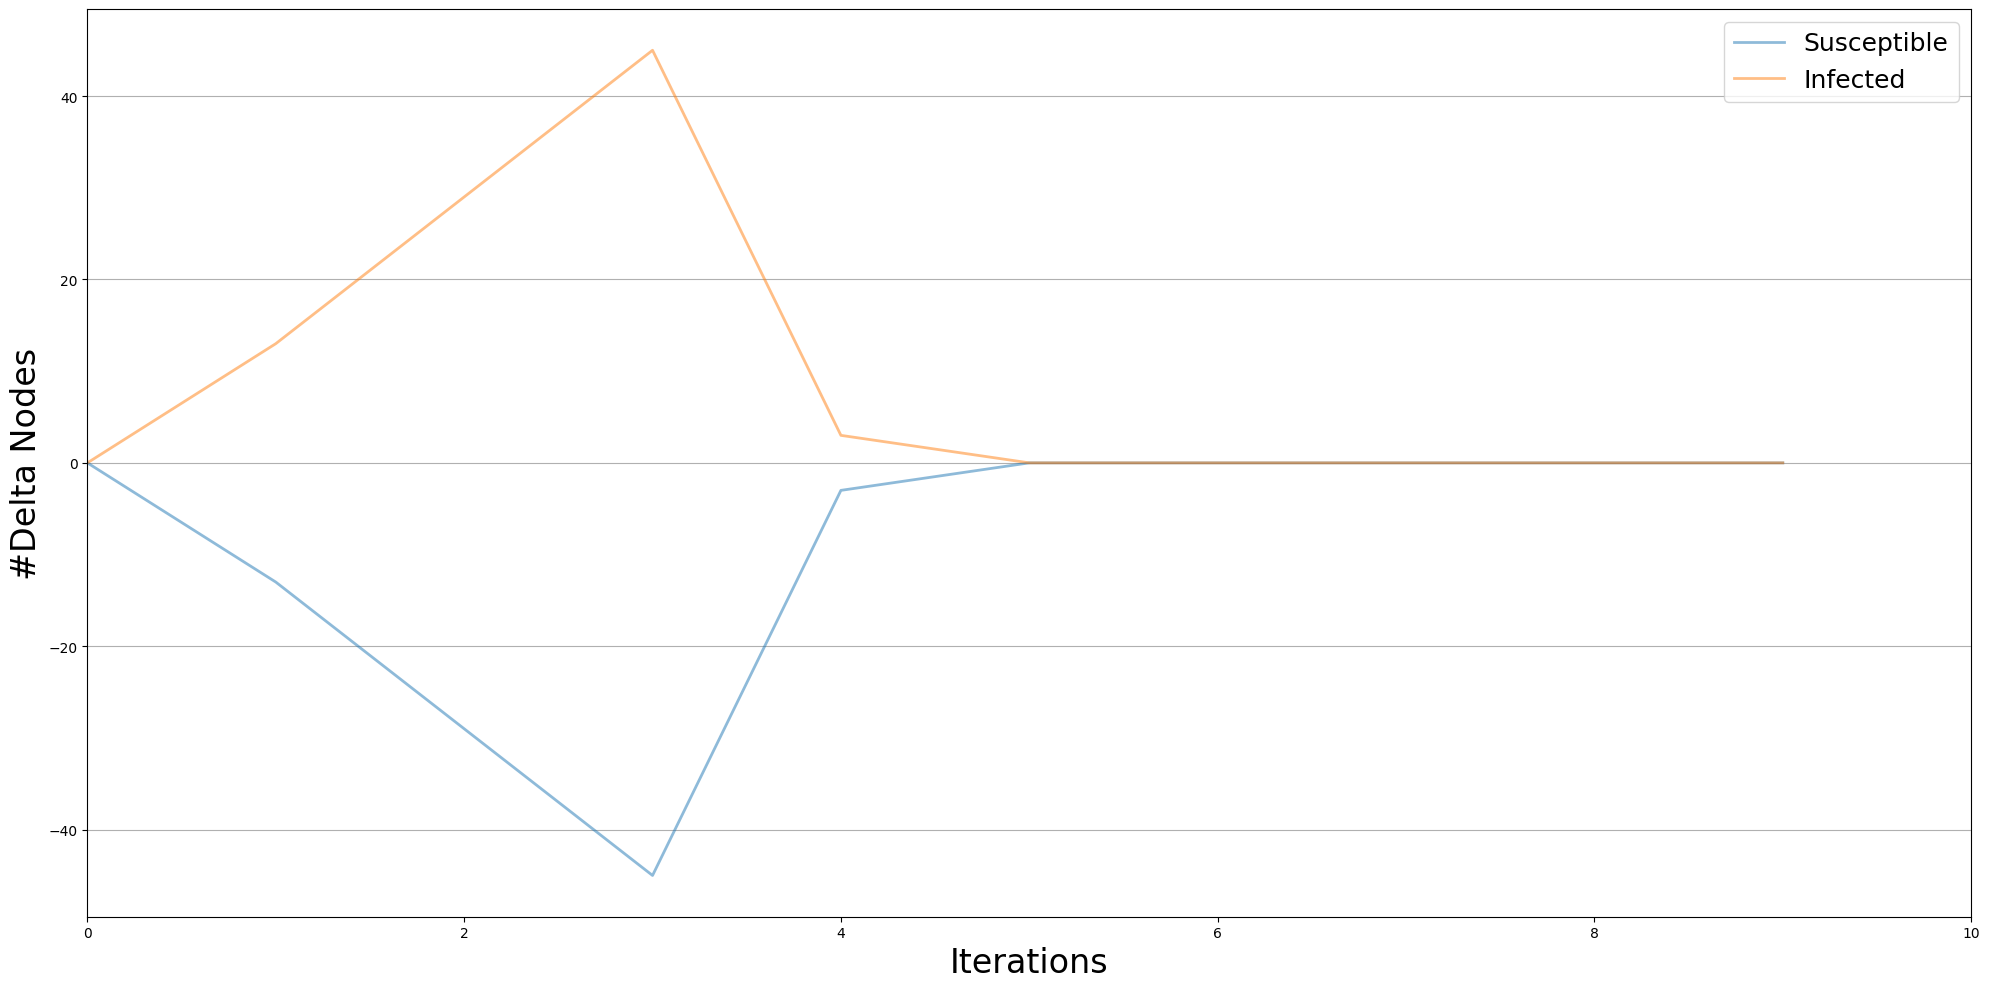

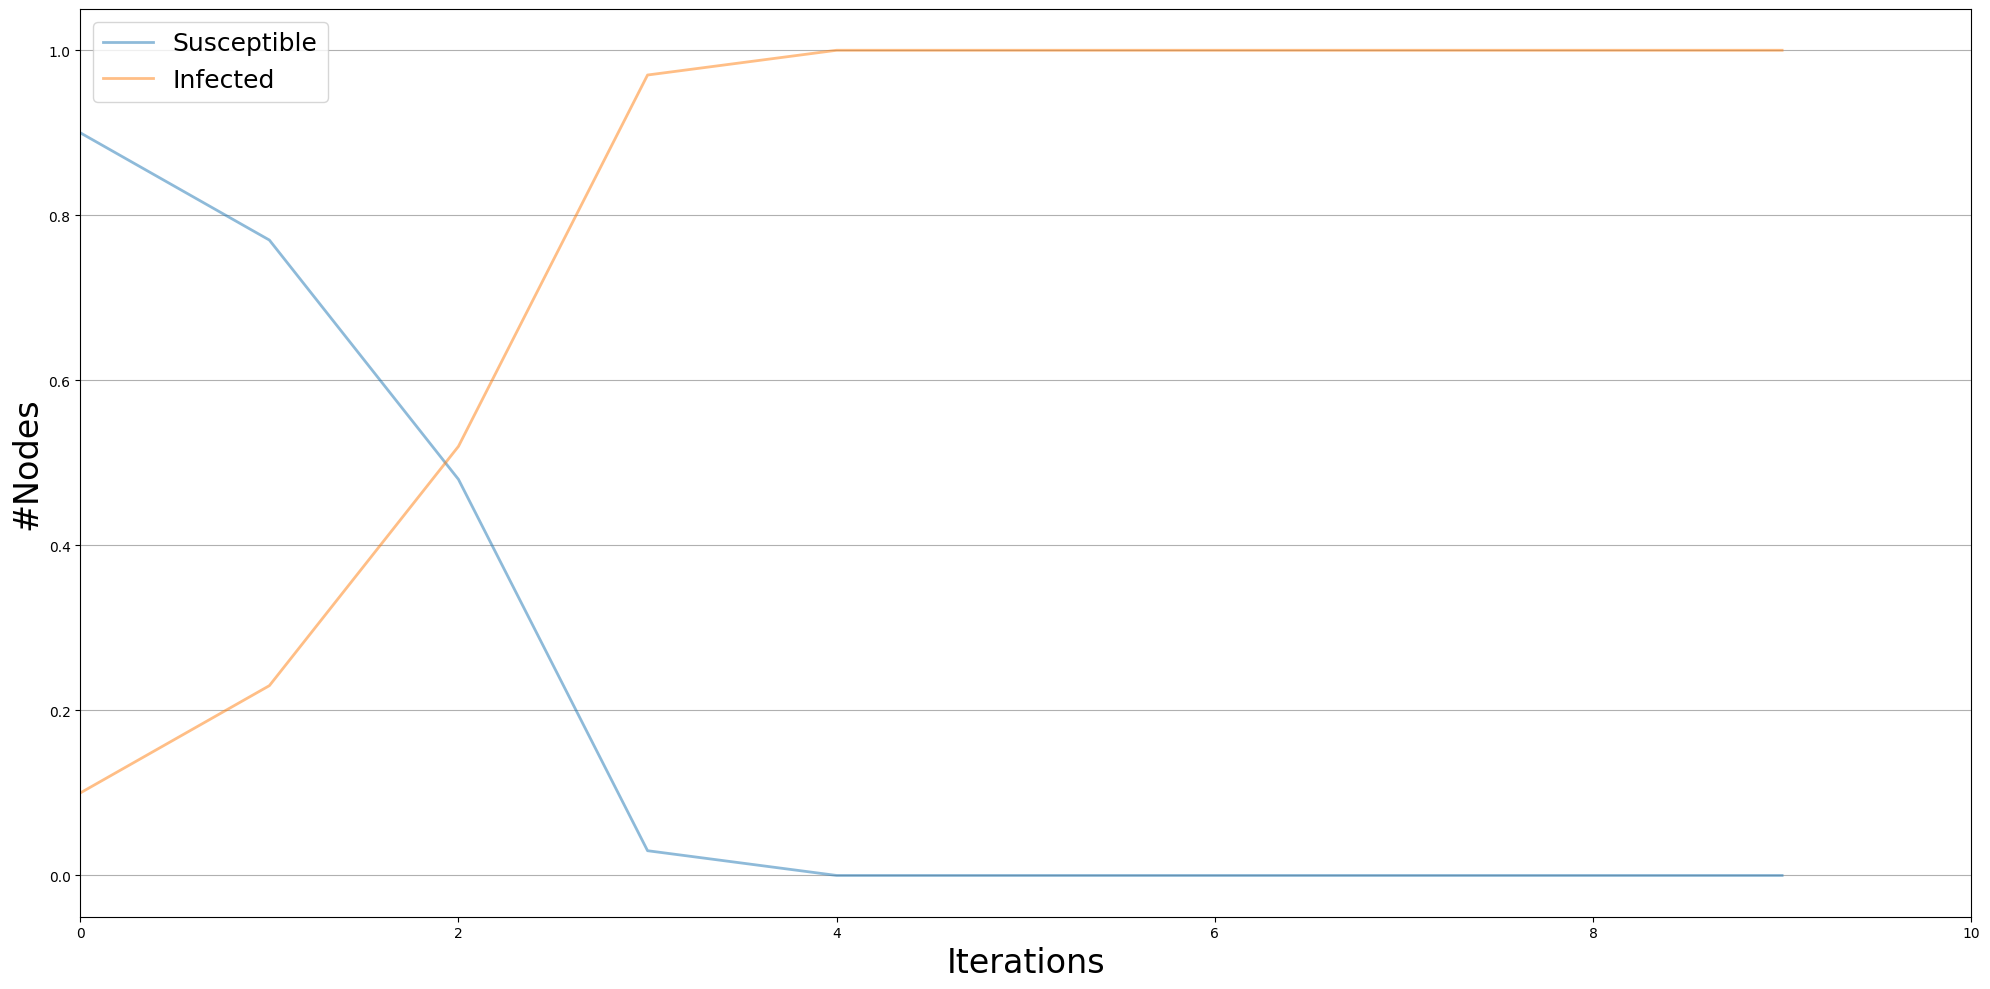

In [13]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

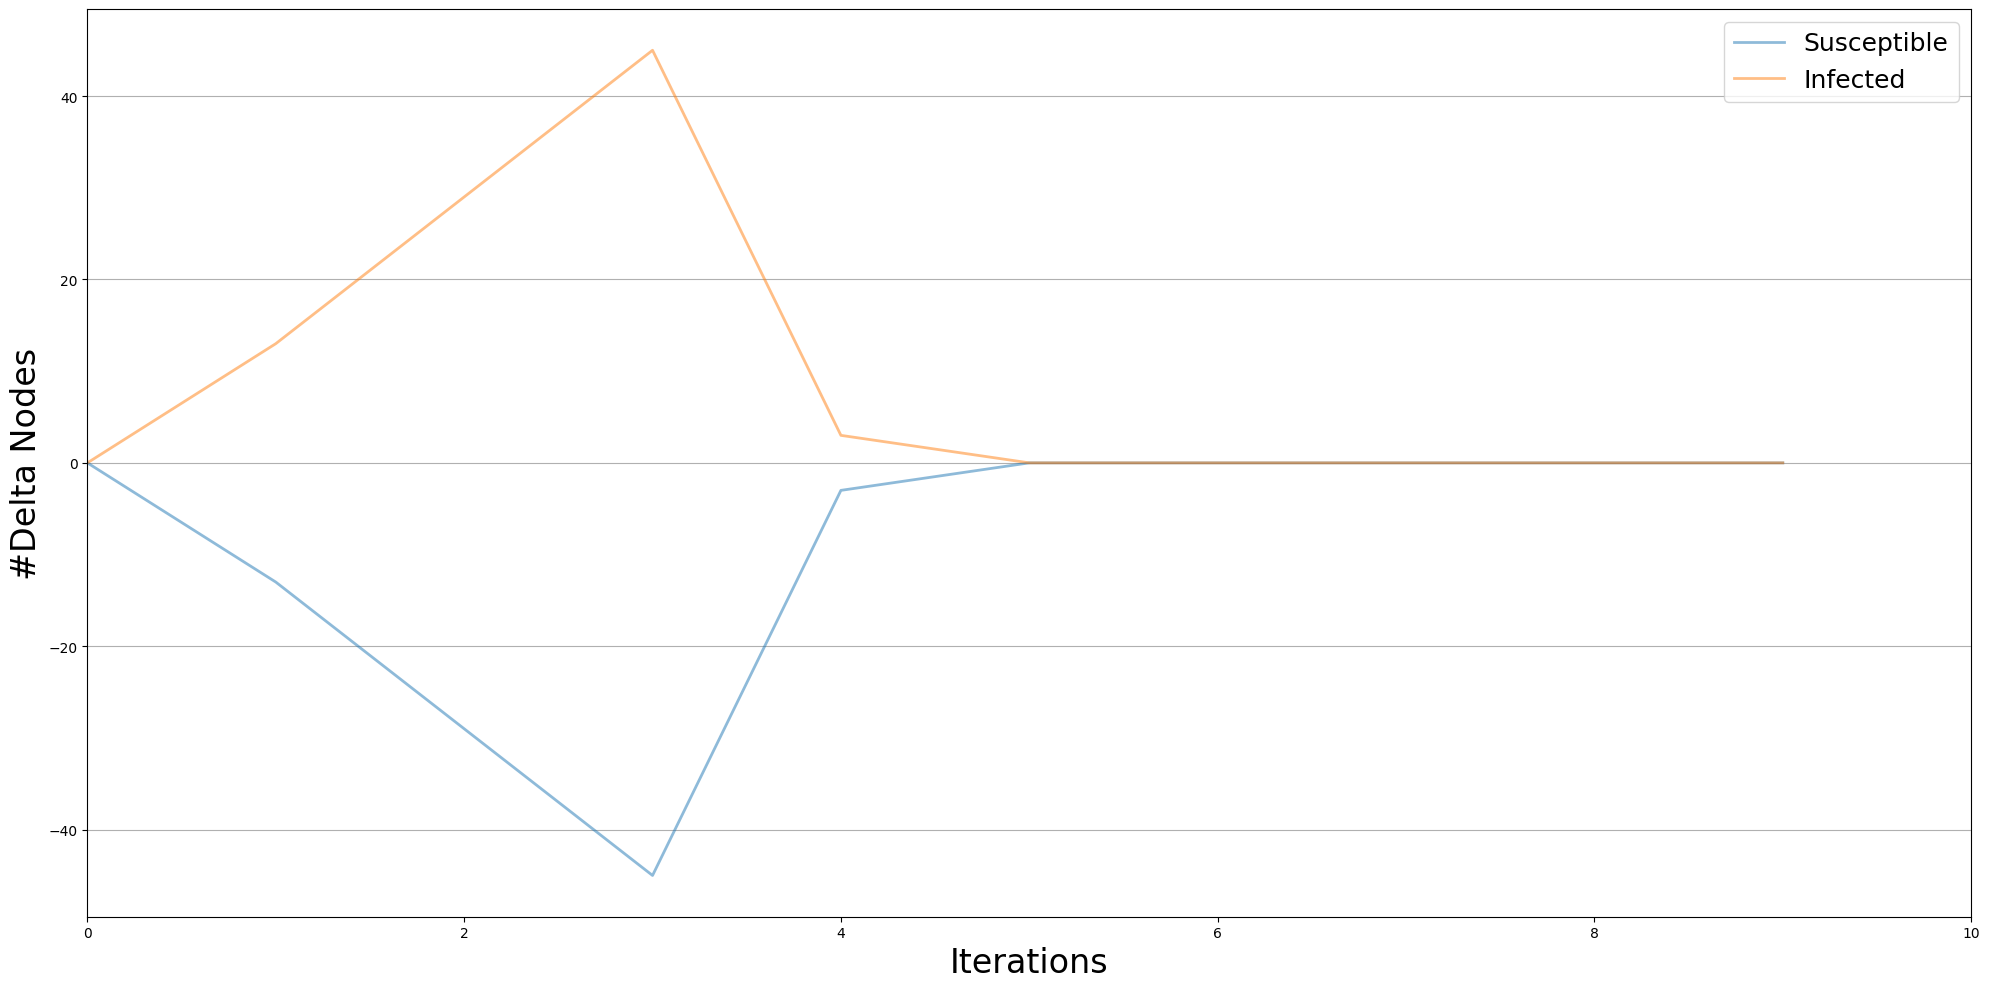

In [14]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()